In [ ]:
#!pip install keras
#!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

<Figure size 432x288 with 0 Axes>

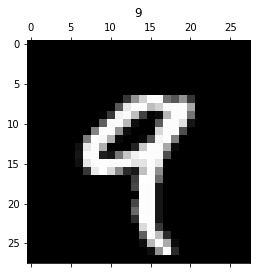

In [8]:
plt.gray()
n = 11121### linha na matriz train de 0 a 59999
plt.matshow(train_X[4])
plt.title(train_y[4])
plt.show()

In [13]:
train_X.shape

(60000, 28, 28)

In [14]:
train_X = train_X.reshape((train_X.shape[0],28*28))

test_X = test_X.reshape((test_X.shape[0],28*28))

### Split treino e validação

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

### Treinar modelo

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf = RandomForestClassifier(random_state=23, max_depth= 10)

In [23]:
%%time
clf.fit(train_X, train_y)

Wall time: 27.1 s


RandomForestClassifier(max_depth=10, random_state=23)

#### Principais métricas
Acurácia

Precisão

Recall

F1

In [26]:
## precisão 
### total de casos 100 casos, sendo 30 deles 1 e 70 0
## modelo classificou 35 como 1, e acertou 27
### precisão = acertou/(acertou+errou) = acertou/(classificou como X)
27/35 ## precisao

0.7714285714285715

In [27]:
(65+27)/100 ## acurácia

0.92

In [28]:
## recall
## dado o qeu vc precisava classificar como 1, o % q vc classificou corretamente como 1
27/30

0.9

In [29]:
2*(0.77*0.9)/(0.77+0.9)## F1

0.8299401197604791

##### Continuando a verificação de performance

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [42]:
pred = clf.predict(val_X)

print('Acurácia:',accuracy_score(pred, val_y))
print('Precisao:',precision_score(pred, val_y, average=None),'\n')
print('Recall:',recall_score(pred, val_y, average=None),'\n')
print('F1',f1_score(pred, val_y, average=None),'\n')

Acurácia: 0.94675
Precisao: [0.97531915 0.98108926 0.95400341 0.92288761 0.93367347 0.92844203
 0.97366185 0.93841416 0.93017241 0.92629816] 

Recall: [0.97366185 0.96074074 0.93411176 0.94856661 0.94006849 0.96516008
 0.96708861 0.95758052 0.9358196  0.88692863] 

F1 [0.9744898  0.97080838 0.9439528  0.93555094 0.93686007 0.94644506
 0.9703641  0.94790047 0.93298746 0.90618599] 



In [44]:
pred = clf.predict(test_X)

print('Acurácia:',accuracy_score(pred, test_y))
print('Precisao:',precision_score(pred, test_y, average=None),'\n')
print('Recall:',recall_score(pred, test_y, average=None),'\n')
print('F1',f1_score(pred, test_y, average=None),'\n')

Acurácia: 0.9471
Precisao: [0.9877551  0.9876652  0.94379845 0.93663366 0.9185336  0.93049327
 0.96868476 0.93093385 0.93223819 0.92864222] 

Recall: [0.96993988 0.97393571 0.94655005 0.946      0.94847529 0.9617613
 0.95277207 0.95413759 0.93223819 0.88647114] 

F1 [0.97876643 0.98075241 0.94517225 0.94129353 0.93326436 0.94586895
 0.96066253 0.94239291 0.93223819 0.9070668 ] 



In [51]:
from sklearn.metrics import classification_report

In [55]:
pred = clf.predict(val_X)

print(classification_report(pred, val_y, labels = clf.classes_))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1177
           1       0.98      0.96      0.97      1350
           2       0.95      0.93      0.94      1199
           3       0.92      0.95      0.94      1186
           4       0.93      0.94      0.94      1168
           5       0.93      0.97      0.95      1062
           6       0.97      0.97      0.97      1185
           7       0.94      0.96      0.95      1273
           8       0.93      0.94      0.93      1153
           9       0.93      0.89      0.91      1247

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [54]:
pred = clf.predict(test_X)

print(classification_report(pred, test_y, labels = clf.classes_))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       998
           1       0.99      0.97      0.98      1151
           2       0.94      0.95      0.95      1029
           3       0.94      0.95      0.94      1000
           4       0.92      0.95      0.93       951
           5       0.93      0.96      0.95       863
           6       0.97      0.95      0.96       974
           7       0.93      0.95      0.94      1003
           8       0.93      0.93      0.93       974
           9       0.93      0.89      0.91      1057

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### Olhando via proba

In [62]:
df = pd.DataFrame(clf.predict_proba(val_X))
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.006416,0.003291,0.007887,0.037674,0.013866,0.032936,0.006452,0.851836,0.013779,0.025863
1,0.003398,0.001714,0.010832,0.890778,0.002463,0.050093,0.001266,0.001024,0.030452,0.007979
2,0.006381,0.012276,0.018179,0.036577,0.013008,0.040343,0.013553,0.007012,0.834895,0.017777
3,0.002001,0.008034,0.004943,0.012215,0.102780,0.017840,0.005455,0.041193,0.049899,0.755642
4,0.006925,0.002487,0.065808,0.842140,0.001019,0.028669,0.003916,0.001336,0.039140,0.008561


In [74]:
df.columns[df.iloc[3]>0.1]

Int64Index([4, 9], dtype='int64')